In [7]:
# you will be prompted with a window asking to grant permissions
from google.colab import drive
drive.mount("/content/drive", force_remount = True)

Mounted at /content/drive


In [8]:
# fill in the path in your Google Drive in the string below. Note: do not escape slashes or spaces
import os
datadir = "/content/project"
#if not os.path.exists(datadir):
!ln -s "/content/drive/My Drive/CS444DLforCV/project" $datadir # TODO: Fill your Assignment 3 path
os.chdir(datadir)
!pwd

/content/drive/My Drive/CS444DLforCV/project


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
from torchvision import transforms
from torchvision.models import resnet18, ResNet18_Weights
from tqdm import tqdm
import json
from pathlib import Path
import os
import detectors
import timm


Downloading: "https://huggingface.co/edadaltocg/resnet18_svhn/resolve/main/pytorch_model.bin" to /root/.cache/torch/hub/checkpoints/resnet18_svhn.pth
100%|██████████| 42.7M/42.7M [00:03<00:00, 12.4MB/s]


In [32]:
transform_test = transforms.Compose(
    [
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.4060), (0.229, 0.224, 0.225)),
    ]
)

In [4]:
def get_transformations():
    preprocess = transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ]
    )

    resize = transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
        ]
    )

    return preprocess, resize

In [5]:
def save_and_show_output(images, label, directory):
    fig, axs = plt.subplots(1, 2)
    fig.set_figheight(10)
    fig.set_figwidth(10)

    axs[0].imshow(images[0])
    axs[0].axis("off")
    axs[0].set_title(label)
    axs[1].imshow(images[1])
    axs[1].set_title("Integrated Gradient")
    axs[1].axis("off")
    fig.tight_layout()
    plt.savefig(directory)


In [29]:
def integrated_gradients(input, referenceImage, net, label):
    gradAvg = 0

    estIterations = 100

    for i in range(estIterations):
        x = referenceImage
        x = x + ((i+1) / estIterations) * (input - referenceImage)
        x.requires_grad = True

        output = net(x)
        predictProbab = output[0, label]

        grad = torch.autograd.grad(predictProbab, x)[0]
        gradAvg += grad / estIterations

    gradients = gradAvg * (input - referenceImage)

    return gradients


input:torch.Size([1, 3, 224, 224])
referenceImage:torch.Size([1, 3, 224, 224])


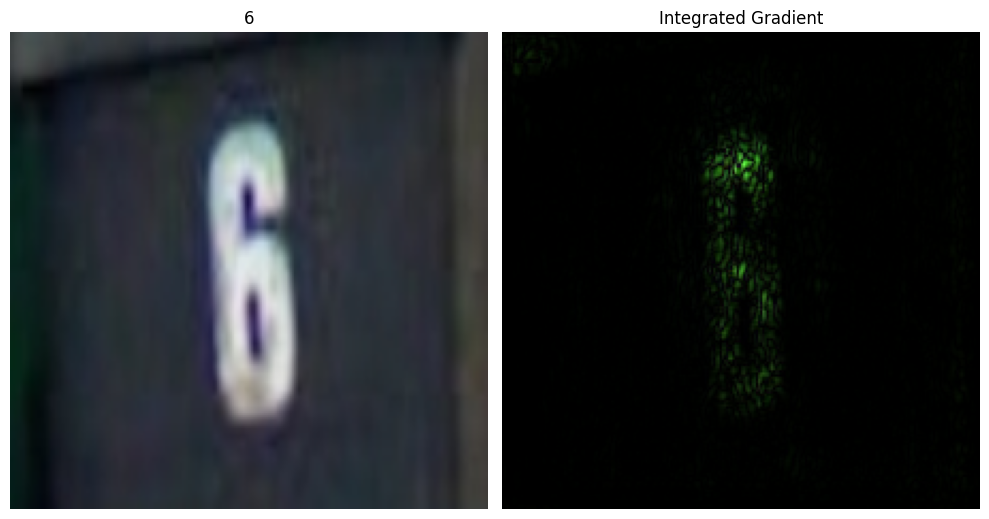

In [42]:
#images_to_try = ["1.jpg", "7"]
inputFile = "input/6.png"
referenceImageFile = "input/blank.png"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


idx = 6  # tabby cat class

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = timm.create_model("resnet18_svhn", pretrained=True)
model.to(device)
model.eval()

input = Image.open(inputFile).convert("RGB")
referenceImage = Image.open(referenceImageFile).convert("RGB")

input = transform_test(input).unsqueeze(0)
referenceImage = transform_test(referenceImage).unsqueeze(0)
print("input:"+str(input.shape))
print("referenceImage:"+str(referenceImage.shape))
input = input.to(device)
referenceImage = referenceImage.to(device)

gradients = integrated_gradients(input, referenceImage, model, idx)

gradients = gradients.squeeze(0)
gradients = gradients.permute(1,2,0)
imagerecon = input.squeeze(0)
imagerecon = transforms.Normalize((0,0,0), (1/0.229, 1/0.224, 1/0.225))(imagerecon)
imagerecon = transforms.Normalize((-0.485, -0.456, -0.4060), (1, 1, 1))(imagerecon)
imagerecon = imagerecon.permute(1,2,0)

gradientsCpu = np.fabs(gradients.cpu().data.numpy())
gradientsCpu = gradientsCpu / np.max(gradientsCpu)

images = [imagerecon.cpu().data.numpy(), gradientsCpu]

save_and_show_output(images, "6", "output/test_resnet_"+ inputFile.split('/')[-1])


In [ ]:
Batch_x shape: torch.Size([1, 3, 224, 224])
resized_tensor_x shape: torch.Size([3, 224, 224])
resized_batch_x shape: torch.Size([1, 3, 224, 224])

In [ ]:
torch.hub.list('pytorch/vision

In [15]:
ResNet18_Weights.DEFAULT.meta["categories"]

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python',
 'Indian cobr